In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1. Usando la expresión g=2d/t^2 , donde g es la aceleración de la gravedad, d es la distancia desde donde se deja caer un objeto, y t es el tiempo que demora en caer, mida 30 veces el tiempo de caída del objeto desde la misma altura usando un cronómetro. Recuerde que si usa la vista para accionar el cronómetro cuando el objeto llega al piso hay un tiempo de retraso en la respuesta muscular de 0.25 s; si utiliza el oído el retraso es de 0.17 s.

In [0]:
#Se toma una altura de 1.77m en donde se deja caer una pelota a esa altura y cuando se escucha su choque contra el piso, se detenia el cronometro (celular)
Datos = np.array([0.79,0.76,0.86,0.94,0.75,0.67,0.76,0.79,0.81,0.75,0.80,0.66,0.64,0.83,0.60,0.59,0.53,0.82,0.63,0.72,0.75,0.72,0.67,0.73,0.97,0.69,0.73,0.72,0.65,0.83])
retraso = 0.17
h = 1.77
t = Datos - retraso

def g(t,h):
  return (2*h)/(t**2)

G = g(t,h)

In [18]:
print("los datos de la gravedad son:",G)

los datos de la gravedad son: [ 9.20915713 10.16949153  7.43541273  5.97065272 10.52318668 14.16
 10.16949153  9.20915713  8.64257812 10.52318668  8.9191232  14.74385673
 16.02535084  8.12672176 19.14548405 20.06802721 27.31481481  8.37869822
 16.72967864 11.70247934 10.52318668 11.70247934 14.16       11.28826531
  5.53125    13.09171598 11.28826531 11.70247934 15.36458333  8.12672176]


2. Determine la media de los tiempos y grafique el residuo respecto a la media. ¿Son sus datos aleatorios? Si detecta algún valor sesgado que usted considere fue un error humano, retírelo, vuelva a determinar la media, los residuos, y vuelva a graficar (no borre la gráfica anterior para efectos de comparación).

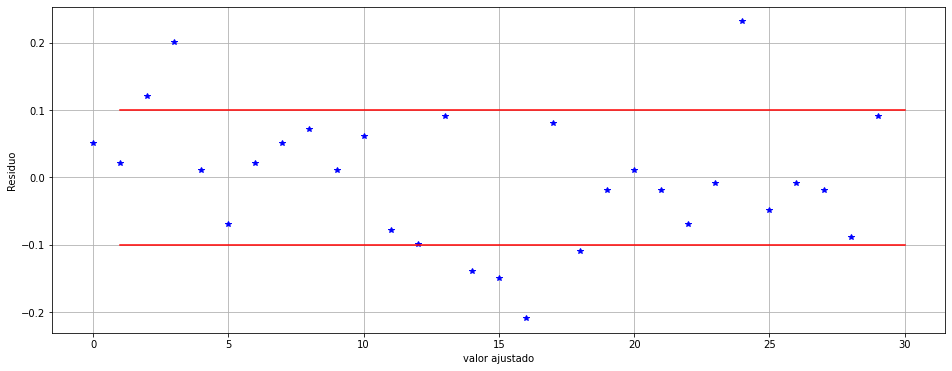

In [0]:
#Gráfica de residuo con respecto a la media
med = np.mean(t)
residuo = t - med
fig3 = plt.figure(figsize=(16,6))
plt.plot(residuo,'b*')
plt.plot([1,2,30],[0.1,0.1,0.1],'r-')
plt.plot([1,2,30],[-0.1,-0.1,-0.1],'r-')
plt.xlabel("valor ajustado")
plt.ylabel("Residuo")
plt.grid()

He decidido poner un rango en donde yo considero que los valores que esten por fuera de ese rango vendria a ser error humano. Por lo cual viendo la gráfica son 7, identificados esos valores sesgados procedo a quitarlos y a volver hacer la gráfica

In [0]:
nuevo_datos = np.array([0.79,0.76,0.75,0.67,0.76,0.79,0.81,0.75,0.80,0.66,0.64,0.83,0.82,0.72,0.75,0.72,0.67,0.73,0.69,0.73,0.72,0.65,0.83])
retraso = 0.17
h = 1.77
t2 = nuevo_datos - retraso

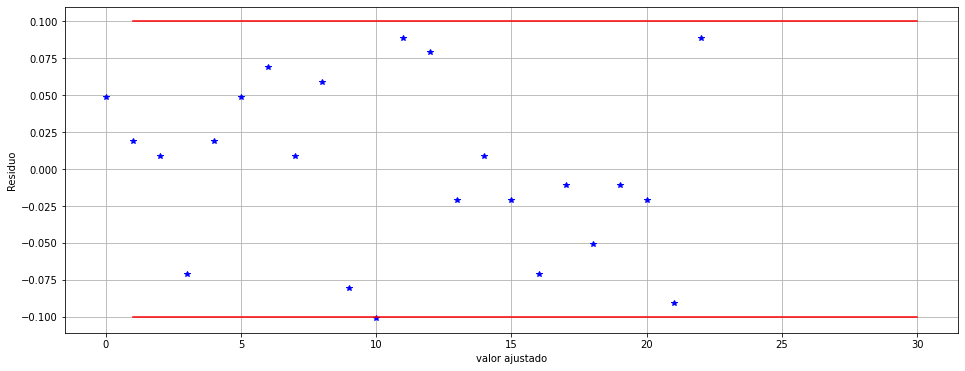

In [0]:
med2 = np.mean(t2)
residuo = t2 - med2
fig3 = plt.figure(figsize=(16,6))
plt.plot(residuo,'b*')
plt.plot([1,2,30],[0.1,0.1,0.1],'r-')
plt.plot([1,2,30],[-0.1,-0.1,-0.1],'r-')
plt.xlabel("valor ajustado")
plt.ylabel("Residuo")
plt.grid()

Despues de corregir los datos, vemos que en la gráfica de residuo hay un comportamiento aleatorio.

3. Utilice la ecuación del punto 1 para determinar la aceleración de la gravedad para cada tiempo. Agrupe las aceleraciones en grupos de 5, 15 y 30 datos y realice los siguientes pasos con cada grupo: (a) determine la aceleración promedio y el error estándar, (b) En una misma figura grafique el valor promedio con barras de error de un error estándar, 3 errores estándar, y con la corrección de t-student para una incerteza del 0.27%. Incluya en la gráfica como valor aceptado para la aceleración g=977 cm/s^2. Analice y concluya sobre el resultado para cada grupo y cada error reportado.

In [0]:
#agrupaciones de datos
G2 = g(t2,h)

d1 = np.random.choice(G2,size=(5))
d2 = np.random.choice(G2,size=(15))
d3 = np.random.choice(G2,size=(30))

In [0]:
#Aceleración promedio y error de estándaar
medg1 = np.mean(d1)
medg2 = np.mean(d2)
medg3 = np.mean(d3)

stdg1 = np.std(d1)
stdg2 = np.std(d2)
stdg3 = np.std(d3)

def errorstand(std,n):
  return std/(np.sqrt(n))

In [0]:
print(errorstand(stdg1,np.size(d1)), medg1)
print(errorstand(stdg2,np.size(d2)), medg2)
print(errorstand(stdg3,np.size(d3)), medg3)

0.9112655165521887 10.841708869477795
0.4395235718451191 10.662756545337421
0.420712399516366 11.189265436335257


| grupos de # | promedio | Error estándar |
|---|---|---|
| 5 | 10.84 | 0.91 |
| 15 | 10.66 | 0.44 | 
| 30 | 11.19 | 0.42 | 

In [0]:
#parte b del punto 3
errortri1 = 3*errorstand(stdg1,np.size(d1))
errortri2 = 3*errorstand(stdg2,np.size(d2))
errortri3 = 3*errorstand(stdg3,np.size(d3))
print(errortri1,errortri2,errortri3)

2.733796549656566 1.3185707155353572 1.2621371985490981


In [0]:
#correción de t-studen con incerteza de 0.27%
alpha = 0.27
n1 = 5
n2 = 15
n3 = 30
gdl1 = n1 - 1
gdl2 = n2 - 1
gdl3 = n3 - 1
confi = 1 - alpha/100

aux1 = stats.t.interval(confi,gdl1,loc=0,scale=1)
aux2 = stats.t.interval(confi,gdl2,loc=0,scale=1)
aux3 = stats.t.interval(confi,gdl3,loc=0,scale=1)

valor_t1 = aux1[1]
valor_t2 = aux2[1]
valor_t3 = aux3[1]

print('correccion de t-student:',[valor_t1,valor_t2,valor_t3])

correccion de t-student: [6.620071562817905, 3.6357628612646247, 3.2803967746753306]


Text(0, 0.5, 'valor promedio')

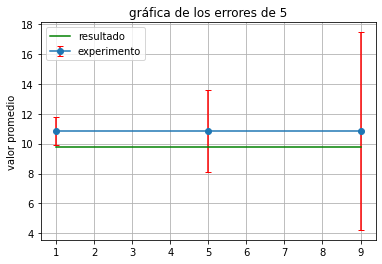

In [0]:
y = [medg1,medg1,medg1]

x = [1,5,9]

t_error = [errorstand(stdg1,np.size(d1)),errortri1,valor_t1]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3,label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-',label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 5')
plt.ylabel('valor promedio')

Text(0, 0.5, 'valor promedio')

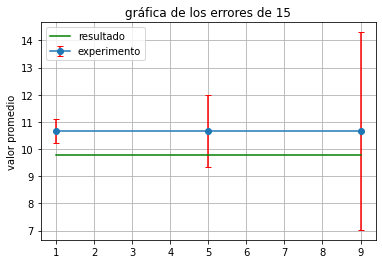

In [0]:
y = [medg2,medg2,medg2]

x = [1,5,9]

t_error = [errorstand(stdg2,np.size(d2)),errortri2,valor_t2]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3, label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-', label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 15')
plt.ylabel('valor promedio')

Text(0, 0.5, 'valor promedio')

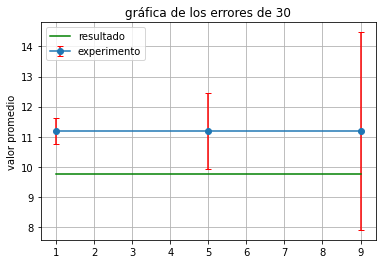

In [0]:
y = [medg3,medg3,medg3]

x = [1,5,9]

t_error = [errorstand(stdg3,np.size(d3)),errortri3,valor_t3]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3, label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-', label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 30')
plt.ylabel('valor promedio')

Algo notable de las tres graficas es que el error estándar de la agrupación de 5  llega al rango del resultado de la gravedad de Medellin. Siendo este un rango de error muy pequeño. Sin embargo mirando la corrección de t-student, el rango del error es tan grande, que permite el resultado esperado se encuentre dentro de dicho rango. podemos observar que la gráfica que tiene el resultado más cercano al valor esperado es el de la agrupación de 5 datos.

4. Determine el porcentaje de error del valor central para cada grupo con respecto al valor esperado para Medellín. Analice y concluya.

In [0]:
error1 = ((np.abs(9.77-medg1))/9.77)*100
error2 = ((np.abs(9.77-medg2))/9.77)*100
error3 = ((np.abs(9.77-medg3))/9.77)*100

print(error1,error2,error3)

10.969384539179075 9.137733319727962 14.526770075079398


| grupos de # | %Error del valor central | 
|---|---|
| 5 | 10.96%| 
| 15 | 9.14% |  
| 30 | 14.52% | 

-como podemos ver el grupo de 15 tienen el valor más pequeño, haciendo que este sea el valor más aproximado del resultado esperado. ahora la agrupación de 5 es más grande es por la "falta de datos" y el de 30 es mucho mayor...lo más probable sea es que se repitan algunos datos. Recordemos que usamos la tarea de np.random para tener datos aleatorios del mismo.

5. Es de esperarse la existencia de un error sistemático debido al factor humano al accionar el cronómetro. Proponga y realice el experimento de una forma que evite la existencia de este factor humano. Repita los puntos 2, 3 y 4 con las nuevas medidas. ¿Nota alguna mejoría con respecto a los resultados anteriores? Concluya.

la medida que propongo es que sea un trabajo en equipo. Mientras uno está tirando la pelota, otra persona toma el tiempo de caida de la pelota. La ves anterior lo hice solo y puede que hayan errores porque tenía que estar pendiente del cronometro y de la caida de la pelota. La ayuda se la pedí a una persona que no está acustambrada a los experimentos cientificos o a la toma de datos experimentales. Sería bueno tener eso encuenta a que yo siendo un estudiante de ciencias exactas, se podría decir que estoy un poco más interiorisado en la toma de datos experimentales y los errores puede que sean menores a los de una persona que no está acostumbrado a eso. Con eso en mente procedemos a los punto 2,3,4.

In [28]:
#se hace a la misma altura de 1.77m y se usa los ojos para ver como cae la pelota, osea que debemos de tener encuenta el retraso de 0.25s

Datos2 = np.array([0.52,0.42,0.51,0.28,0.50,0.41,0.49,0.53,0.60,0.54,0.48,0.42,0.47,0.33,0.42,0.57,0.59,0.66,0.41,0.51,0.62,0.50,0.60,0.50,0.60,0.70,0.44,0.69,0.54,0.63])
retraso = 0.25
h = 1.77
t_nuevo = Datos2 - retraso

G_nuevo = g(t_nuevo,h)

print("los datos de la gravedad son:", G_nuevo)

los datos de la gravedad son: [  48.55967078  122.49134948   52.36686391 3933.33333333   56.64
  138.28125      61.45833333   45.15306122   28.89795918   42.09274673
   66.91871456  122.49134948   73.14049587  553.125       122.49134948
   34.5703125    30.62283737   21.05889352  138.28125      52.36686391
   25.85829072   56.64         28.89795918   56.64         28.89795918
   17.48148148   98.06094183   18.28512397   42.09274673   24.51523546]


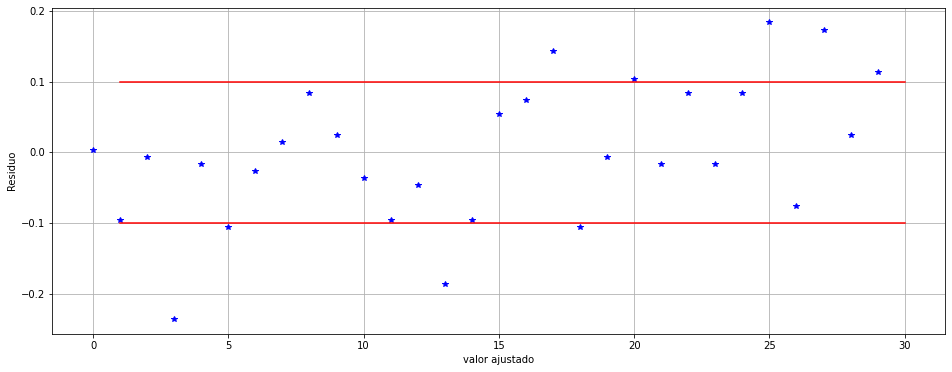

In [35]:
#Gráfica de residuo con respecto a la media
med_nuevo = np.mean(t_nuevo)
residuo_nuevo = t_nuevo - med_nuevo
fig3 = plt.figure(figsize=(16,6))
plt.plot(residuo_nuevo,'b*')
plt.plot([1,2,30],[0.1,0.1,0.1],'r-')
plt.plot([1,2,30],[-0.1,-0.1,-0.1],'r-')
plt.xlabel("valor ajustado")
plt.ylabel("Residuo")
plt.grid()

In [0]:
Datos2_nuevo = np.array([0.52,0.42,0.51,0.50,0.49,0.53,0.60,0.54,0.48,0.42,0.47,0.42,0.57,0.59,0.51,0.50,0.60,0.50,0.60,0.44,0.54])
retraso = 0.25
h = 1.77
t_nuevo2 = Datos2_nuevo - retraso

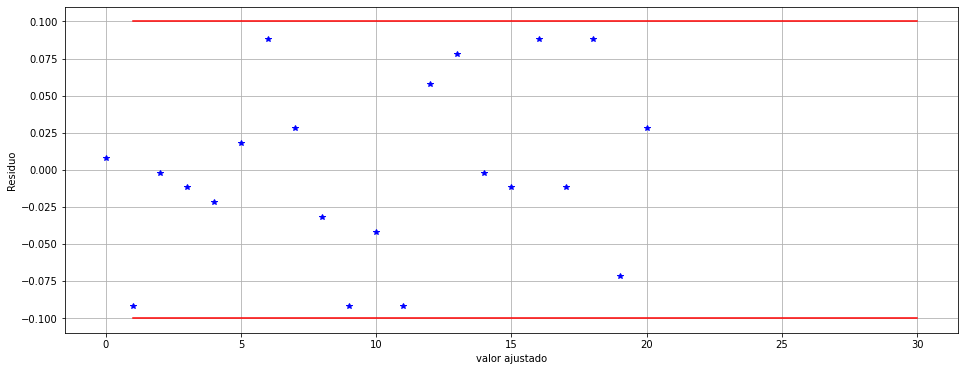

In [34]:
med_nuevo2 = np.mean(t_nuevo2)
residuo_nuevo2 = t_nuevo2 - med_nuevo2
fig3 = plt.figure(figsize=(16,6))
plt.plot(residuo_nuevo2,'b*')
plt.plot([1,2,30],[0.1,0.1,0.1],'r-')
plt.plot([1,2,30],[-0.1,-0.1,-0.1],'r-')
plt.xlabel("valor ajustado")
plt.ylabel("Residuo")
plt.grid()

In [0]:
#agrupaciones de datos
G2_nuevo = g(t_nuevo2,h)

d1_nuevo = np.random.choice(G2_nuevo,size=(5))
d2_nuevo = np.random.choice(G2_nuevo,size=(15))
d3_nuevo = np.random.choice(G2_nuevo,size=(30))

In [37]:
#Aceleración promedio y error de estándaar
medg1_nuevo = np.mean(d1_nuevo)
medg2_nuevo = np.mean(d2_nuevo)
medg3_nuevo = np.mean(d3_nuevo)

stdg1_nuevo = np.std(d1_nuevo)
stdg2_nuevo = np.std(d2_nuevo)
stdg3_nuevo = np.std(d3_nuevo)

print(errorstand(stdg1_nuevo,np.size(d1_nuevo)), medg1_nuevo)
print(errorstand(stdg2_nuevo,np.size(d2_nuevo)), medg2_nuevo)
print(errorstand(stdg3_nuevo,np.size(d3_nuevo)), medg3_nuevo)

15.89271569140803 68.78197222566118
6.905269591284229 65.1053534872164
5.2962723160449 54.85463227314894


| grupos de # | promedio | Error estándar |
|---|---|---|
| 5 | 68.80 | 15.90 |
| 15 | 65.11 | 6.91 | 
| 30 | 54.85 | 5.30 | 

In [39]:
#parte b del punto 3
errortri1_nuevo = 3*errorstand(stdg1_nuevo,np.size(d1_nuevo))
errortri2_nuevo = 3*errorstand(stdg2_nuevo,np.size(d2_nuevo))
errortri3_nuevo = 3*errorstand(stdg3_nuevo,np.size(d3_nuevo))
print(errortri1_nuevo,errortri2_nuevo,errortri3_nuevo)

47.67814707422409 20.715808773852686 15.8888169481347


In [40]:
#correción de t-studen con incerteza de 0.27%
alpha = 0.27
n1 = 5
n2 = 15
n3 = 30
gdl1 = n1 - 1
gdl2 = n2 - 1
gdl3 = n3 - 1
confi = 1 - alpha/100

aux1 = stats.t.interval(confi,gdl1,loc=0,scale=1)
aux2 = stats.t.interval(confi,gdl2,loc=0,scale=1)
aux3 = stats.t.interval(confi,gdl3,loc=0,scale=1)

valor_t1 = aux1[1]
valor_t2 = aux2[1]
valor_t3 = aux3[1]

print('correccion de t-student:',[valor_t1,valor_t2,valor_t3])

correccion de t-student: [6.620071562817905, 3.6357628612646247, 3.2803967746753306]


Text(0, 0.5, 'valor promedio')

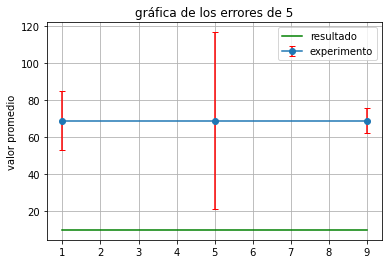

In [41]:
y = [medg1_nuevo,medg1_nuevo,medg1_nuevo]

x = [1,5,9]

t_error = [errorstand(stdg1_nuevo,np.size(d1_nuevo)),errortri1_nuevo,valor_t1]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3,label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-',label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 5')
plt.ylabel('valor promedio')

Text(0, 0.5, 'valor promedio')

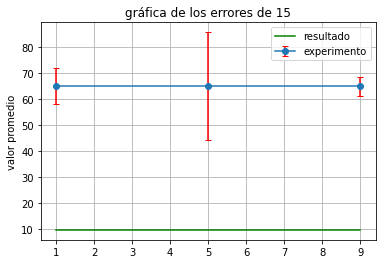

In [43]:
y = [medg2_nuevo,medg2_nuevo,medg2_nuevo]

x = [1,5,9]

t_error = [errorstand(stdg2_nuevo,np.size(d2_nuevo)),errortri2_nuevo,valor_t2]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3,label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-',label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 15')
plt.ylabel('valor promedio')

Text(0, 0.5, 'valor promedio')

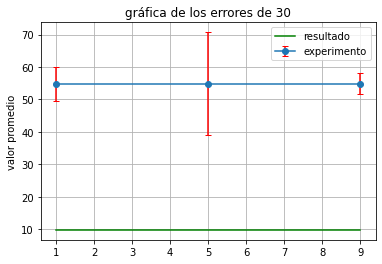

In [45]:
y = [medg3_nuevo,medg3_nuevo,medg3_nuevo]

x = [1,5,9]

t_error = [errorstand(stdg3_nuevo,np.size(d3_nuevo)),errortri3_nuevo,valor_t3]

fig, ax = plt.subplots()
ax.errorbar(x, y, t_error, marker = 'o', ecolor = 'red', capsize = 3,label='experimento')
plt.plot(x,[9.77,9.77,9.77],'g-',label='resultado')
plt.legend()
plt.grid()
plt.title('gráfica de los errores de 30')
plt.ylabel('valor promedio')

In [46]:
error1 = ((np.abs(9.77-medg1_nuevo))/9.77)*100
error2 = ((np.abs(9.77-medg2_nuevo))/9.77)*100
error3 = ((np.abs(9.77-medg3_nuevo))/9.77)*100

print(error1,error2,error3)

604.01199821557 566.3802813430544 461.45990044164733


| grupos de # | %Error del valor central | 
|---|---|
| 5 | 604%| 
| 15 | 566% |  
| 30 | 461% | 

-Como podemos ver con las gráficas y con estos resultados, el error es exageradamente. Esta de más decir que no mejoro el error sistematico todo lo contrario....empeoro, pero....es un muy buen analisis. porque como la persona que tomo los datos no estaba acostumbrada a tomar datos experimentales puede que el error sistematico incremente de manera abrupta. Con esto conlcuyo que incluso para tomar datos sencillos de tiempo, se necesita un poco de conocimiento físico interiorisado.

6. Reporte el valor de la aceleración que obtuvo con el menor error porcentual y con la corrección de t-student para una incerteza del 0.27%

| grupos de # | aceleración | t-student| 
|---|---|---|
| 30 | 11.19 | 3.28 |